# Final Task Project Based Internship IDX Partners x Rakamin Academy

**Credit Risk Prediction** 

**by Daviro Yota Nagasan Wahyudi**

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14764\1028708547.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


# Data Understanding

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
list_item = [] 
for col in df.columns: 
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]]) 

desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.000000,466285,"[0, 1, 2, 3, 4]"
1,id,int64,0,0.000000,466285,"[1077501, 1077430, 1077175, 1076863, 1075358]"
2,member_id,int64,0,0.000000,466285,"[1296599, 1314167, 1313524, 1277178, 1311748]"
3,loan_amnt,int64,0,0.000000,1352,"[5000, 2500, 2400, 10000, 3000]"
4,funded_amnt,int64,0,0.000000,1354,"[5000, 2500, 2400, 10000, 3000]"
...,...,...,...,...,...,...
70,all_util,float64,466285,100.000000,0,[nan]
71,total_rev_hi_lim,float64,70276,15.071469,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0]"
72,inq_fi,float64,466285,100.000000,0,[nan]
73,total_cu_tl,float64,466285,100.000000,0,[nan]


**Number of Records and Attributes**:
- The dataset comprises 466,285 entries and includes 75 different attributes.

**Attribute Data Types**:
- The dataset features three primary data types: **float64**, **int64**, and **object**.

**Missing Data**:
- Several attributes contain fewer entries than the total number of records, indicating the presence of incomplete or missing data. For instance, attributes such as **emp_title**, **emp_length**, **annual_inc**, **delinq_2yrs**, and **revol_util** have fewer non-null entries than the total dataset size.

**Variability in Data Types**:
- Attributes with **float64** and **int64** data types predominantly represent numerical data, including loan amounts, interest rates, and payment figures. On the other hand, attributes with **object** data types likely encompass categorical or textual information such as credit grade, company name, and address.

**Attributes with Missing Values**:
- Certain attributes have a substantial number of missing values, such as **desc**, **mths_since_last_delinq**, and **mths_since_last_record**. These attributes will require special attention during subsequent analysis.

**Date-like Attributes**:
- Attributes with date-like values, including `last_pymnt_d`, `next_pymnt_d`, `last_credit_pull_d`, and `earliest_cr_line`, will be converted to datetime and then accounted for a range of how many days from the last data collection.

**Data Type Adjustments**:
- The `loan_status` attribute is the target feature with categorical values, which will undergo feature engineering.

In [6]:
df.duplicated().sum()

0

**No duplicated data**

In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


**Loan Amount Distribution**:
   - The average loan amount is approximately **14,317**, with a standard deviation of about **8,287**.
   - Loan amounts range from a minimum of **500** to a maximum of **35,000**.

**Average Interest Rate**:
   - The average interest rate stands at approximately **13.83%**, with rates varying between **5.42%** and **26.06%**.

**Average Annual Income**:
   - The average annual income is around **73,277**, with a standard deviation of about **54,963**.
   - Annual incomes range from a minimum of **1,896** to a maximum of **7,500,000**.

**Debt-to-Income Ratio**:
   - The average debt-to-income ratio is about **17.22**, with a standard deviation of around **7.85**.
   - This ratio indicates the proportion of total debt relative to income.

**Years Delinquent**:
   - On average, customers have been delinquent for about **0.28** years, with the majority having no delinquency.

**Data Variability**:
   - The notable standard deviation for certain variables highlights considerable variability within the data.

# Define Label

In [8]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [9]:
df_label = df.copy()

Untuk mengetahui apakah seseorang merupakan peminjam yang baik atau buruk berdasarkan status pinjaman saat ini, maka kita perlu mendefinisikan apa itu pinjaman yang baik dan pinjaman yang buruk terlebih dahulu. Pinjaman yang baik tentunya pinjaman yang pembayarannya lancar, sudah lunas, sedang dalam tempo dan pembayarannya tidak terlambat. Sedangkan pinjaman yang buruk merupakan pinjaman yang pembayarannya macet dan terlambat. Pada dataset yang digunakan terdapat dua status pinjaman yang pembayarannya terlambat dengan durasi keterlambatan yang berbeda. Pada proyek ini, kita asumsikan sebuah pinjaman dianggap buruk jika pembayaran pinjaman terlambat lebih dari 30 hari.

Berdasarkan definisi yang sudah kita tentukan, maka pinjaman dengan status `Current`, `Fully Paid`, `In Grace Period`, `Does not meet the credit policy. Status:Fully Paid`, dan `Late (16-30 days)` sebagai pinjaman yang baik dan status pinjaman sisanya dimasukkan ke dalam pinjaman yang buruk.

In [10]:
good = ['Current', 'Fully Paid', 'In Grace Period','Does not meet the credit policy. Status:Fully Paid','Late (16-30 days)'] 
df_label['loan_status'] = np.where(df_label['loan_status'].isin(good), 1, 0) 
df_label['loan_status'].value_counts()/len(df_label)*100

1    89.069346
0    10.930654
Name: loan_status, dtype: float64

# Exploratory Data Analysis

In [59]:
df_eda = df.copy()

In [60]:
df_eda['risk'] = np.where((df_eda['loan_status'] =='Current') | (df_eda['loan_status'] =='Fully Paid') | (df_eda['loan_status'] =='In Grace Period') | (df_eda['loan_status'] =='Late (16-30 days)') | (df_eda['loan_status'] =='Does not meet the credit policy. Status:Fully Paid'),'Good Risk','Bad Risk')

In [61]:
loan_by_status = df_eda.groupby('loan_status').size().reset_index() 
loan_by_status.columns = ['Target','Total Applicants'] 
loan_by_status['%'] = round(loan_by_status['Total Applicants']*100/sum(loan_by_status['Total Applicants']),2) 
loan_by_status.sort_values(by='Total Applicants', ascending=False).style.background_gradient(cmap='Greens')

,Target,Total Applicants,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully Paid,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charged Off,761,0.160000


### **Loan Status Distribution**

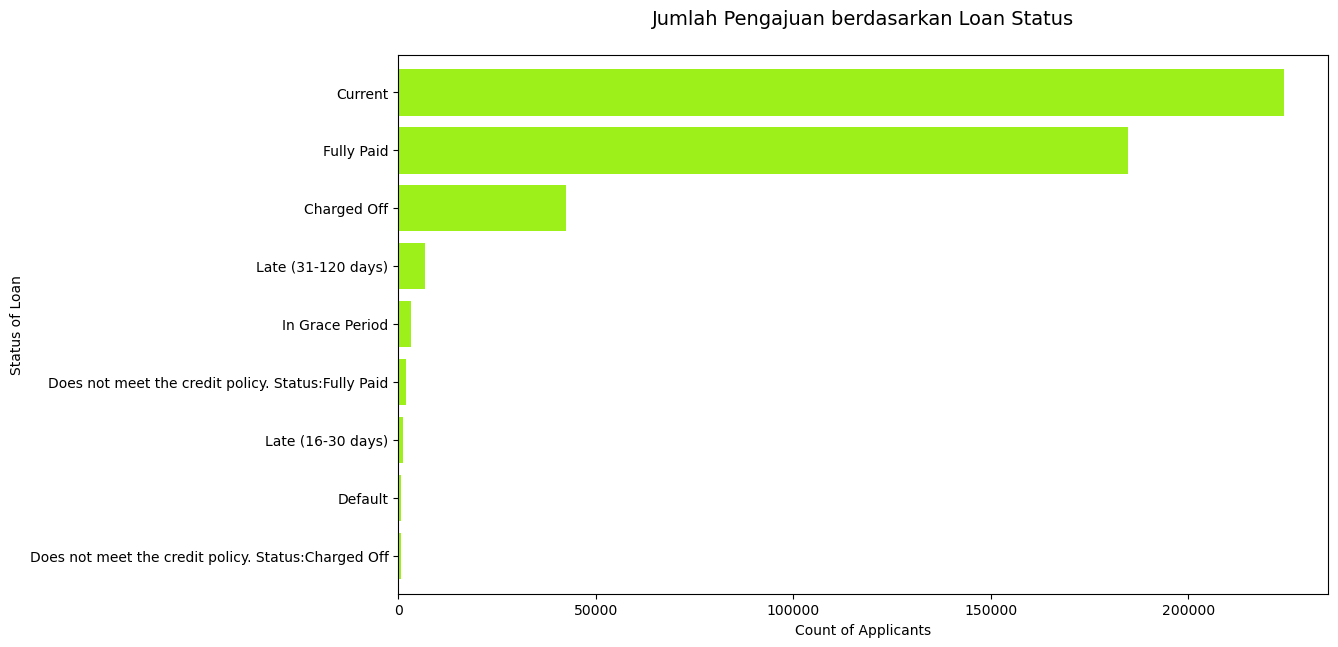

In [62]:
loan_status_counts = df_eda['loan_status'].value_counts().sort_values(ascending=True)

# Membuat plot
fig = plt.figure(figsize=(12, 7)) 
loan_status_counts.plot(kind='barh', color='#9ef01a', width=0.8) 

# Menambahkan judul dan label sumbu
plt.title('Jumlah Pengajuan berdasarkan Loan Status\n', fontsize=14) 
plt.ylabel('Status of Loan') 
plt.xlabel('Count of Applicants')

# Menampilkan plot
plt.show()


- **Current Loan Status**: Approximately 48% of the applicants, which corresponds to around 224,226 individuals, have a loan status of "Current".
- **Fully Paid Loan Status**: About 39.6% of the applicants, or roughly 184,739 individuals, have a loan status of "Fully Paid".

In [63]:
loan_risk = df_eda.groupby('risk').size().reset_index() 
loan_risk.columns = ['Target','Total'] 
loan_risk['%'] = round(loan_risk['Total']*100/sum(loan_risk['Total']),2) 
loan_risk.sort_values(by='Total', ascending=False)

,Target,Total,%
1,Good Risk,415317,89.07
0,Bad Risk,50968,10.93


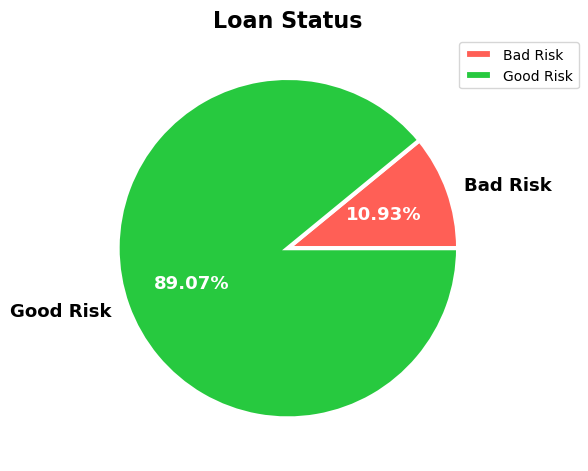

In [64]:
labels = ['Bad Risk', 'Good Risk'] 
colors = ["#ff5f56", "#27c93f"]  

sns.set_palette(sns.color_palette(colors)) 

# Buat plot pie yang baru
fig, ax = plt.subplots(figsize=(6, 6)) 
patches, texts, pcts = plt.pie(loan_risk['Total'], labels=labels, autopct='%.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'fontsize': 13, 'fontweight': 'bold'}) 

plt.setp(pcts, color='white', fontweight=600) 
plt.setp(texts, fontweight=600)

plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1)) 

ax.set_title('Loan Status', fontsize=16, fontweight='bold', color='000000')

plt.tight_layout()
plt.show()

Terlihat bahwa dataset ini sangat tidak seimbang dengan 11% kelas minoritas, yaitu Bad Risk dan 89% majority class yaitu Good Risk

### Loan Purpose Analysis

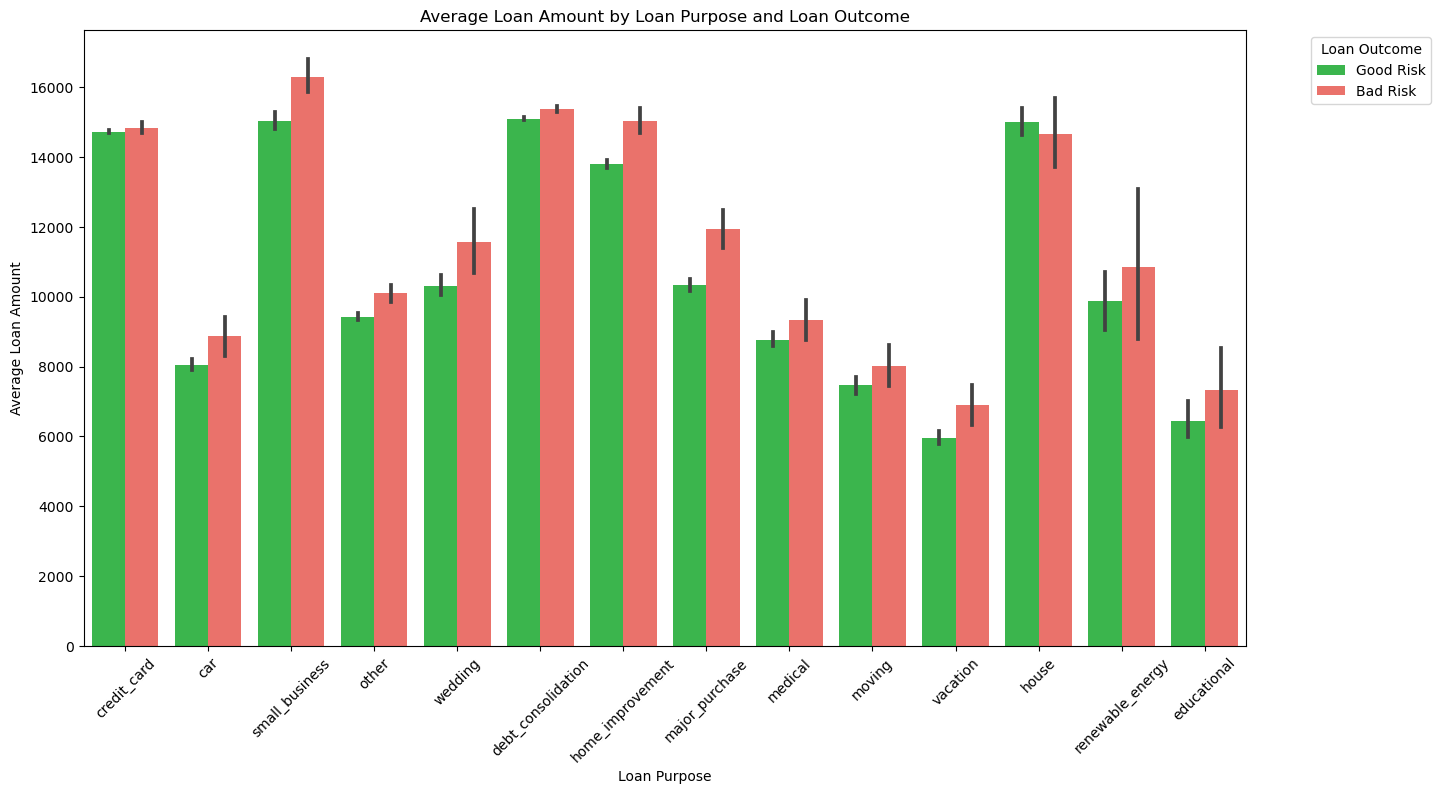

In [65]:
plt.figure(figsize=(15, 8))
sns.set_palette(sns.color_palette(["#27c93f", "#ff5f56"])) 
sns.barplot(x='purpose', y='loan_amnt', hue='risk', data=df_eda)
plt.title('Average Loan Amount by Loan Purpose and Loan Outcome')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Loan Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- **Small Business**: Shows the highest average loan amount for both good and bad loans.

- **House**: The only category where good loans are slightly higher than bad loans.

- **Home Improvement & Major Purchase**: Displays high average loan amounts with a small difference between good and bad loans.

- **Wedding & Medical**: Generally have lower average loan amounts compared to other purposes.

- **Difference between Good and Bad Loans**: Bad loans are typically higher, indicating higher risk.

### **Loan Distribution by State**

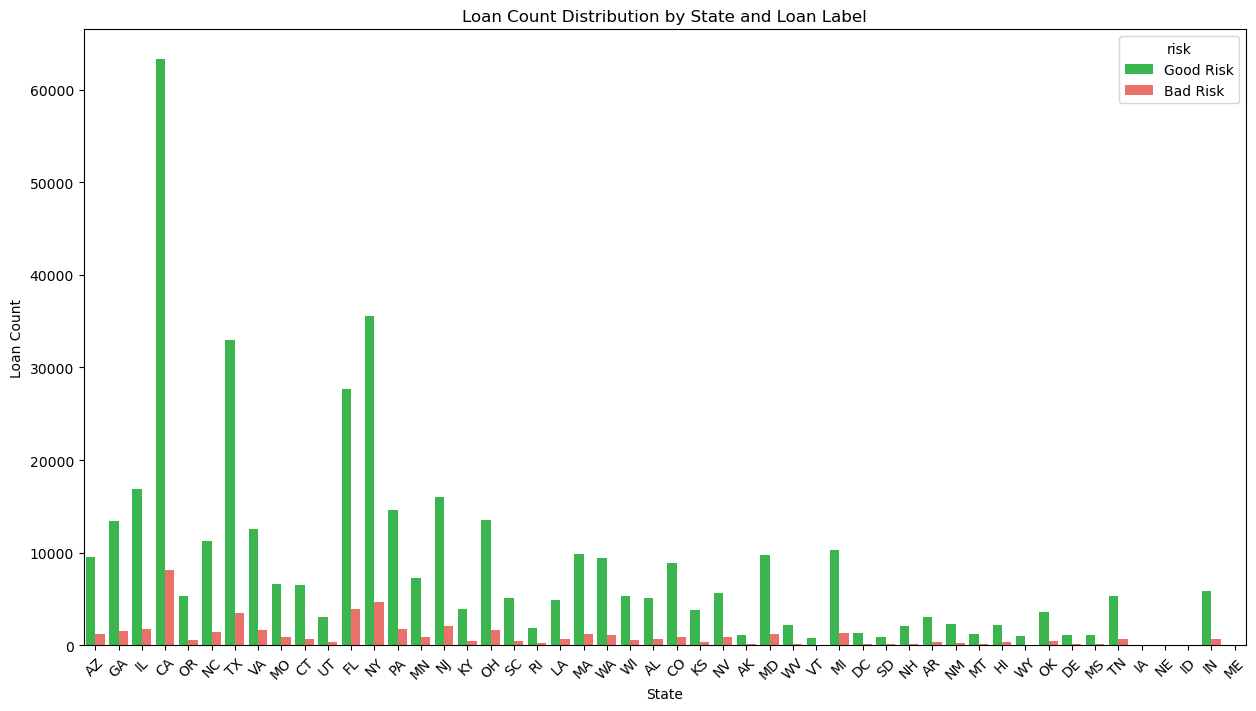

In [66]:
plt.figure(figsize=(15, 8))
sns.countplot(x='addr_state', hue='risk', data=df_eda)
plt.title('Loan Count Distribution by State and Loan Label')
plt.xlabel('State')
plt.ylabel('Loan Count')
plt.xticks(rotation=45)
plt.show()

- **California (CA)**: Exhibits the highest number of loans, both good and bad.
- **New York (NY) & Texas (TX)**: Both states show a high number of loans, indicating an active loan market.
- **Florida (FL) & Illinois (IL)**: These states also have a significant number of loans, although the figures are lower compared to CA, NY, and TX.

### **Loan Term Analysis**

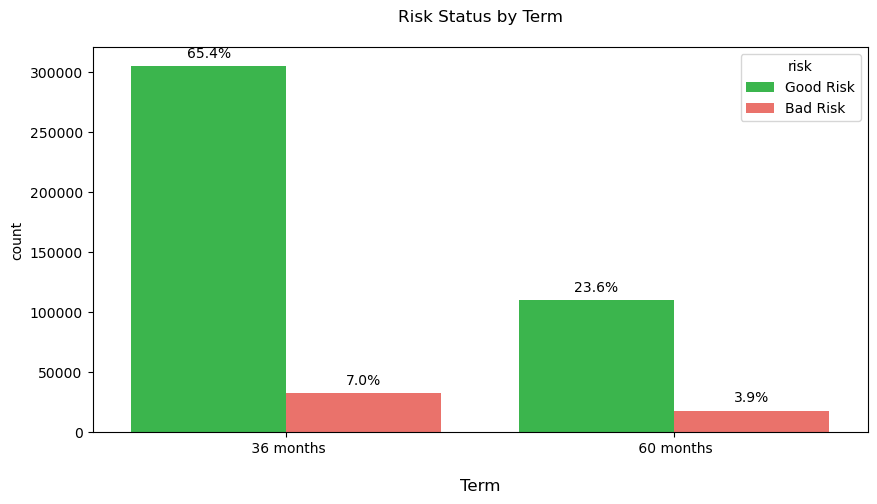

In [67]:
plt.figure(figsize=(10,5))
fig = sns.countplot(data=df_eda, x='term', hue='risk')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)

# Menghitung total untuk setiap grup
total = len(df_eda['term'])

# Menambahkan persentase di atas setiap bar
for p in fig.patches:
    height = p.get_height()
    fig.annotate(f'{height/total:.1%}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points')

plt.show()


- **Loan term** informs us about the amount of loan payments.
- There are only two types of loan terms: 36 months or 60 months. The majority of loans (72.5%) have a shorter term of 36 months.
- Loans with a 36-month term are twice as likely to experience credit default risk compared to loans with a 60-month term.

### Home Ownership Analysis

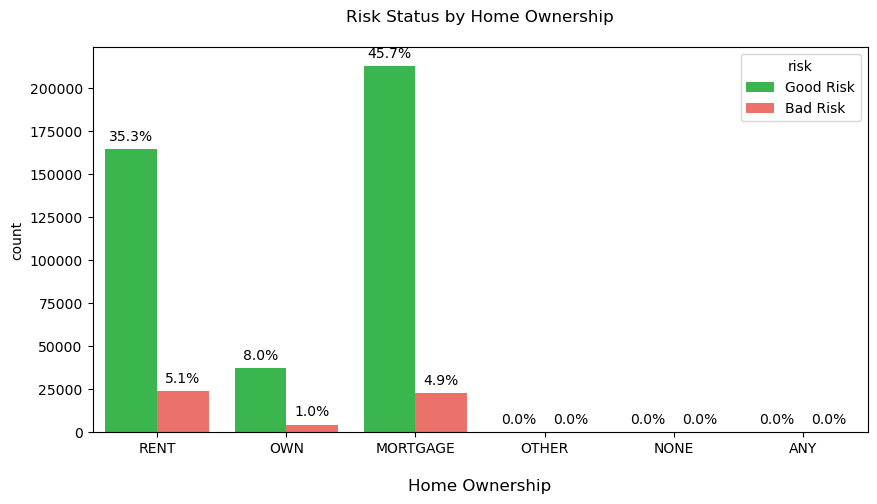

In [68]:
plt.figure(figsize=(10,5))
fig = sns.countplot(data=df_eda, x='home_ownership', hue='risk')
plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)

# Menghitung total untuk setiap grup
total = len(df_eda['home_ownership'])

# Menambahkan persentase di atas setiap bar
for p in fig.patches:
    height = p.get_height()
    fig.annotate(f'{height/total:.1%}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points')

plt.show()

- **Home Ownership** is a category provided by applicants during registration.
- Most applicants either have an ongoing mortgage (51.6%) or are currently renting (40.4%).
- Applicants with either a mortgage or renting have a higher likelihood of credit default risk.

### Cek Korelasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6188\4159093212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_label.corr(), cmap='coolwarm', annot=True, fmt='.2f')


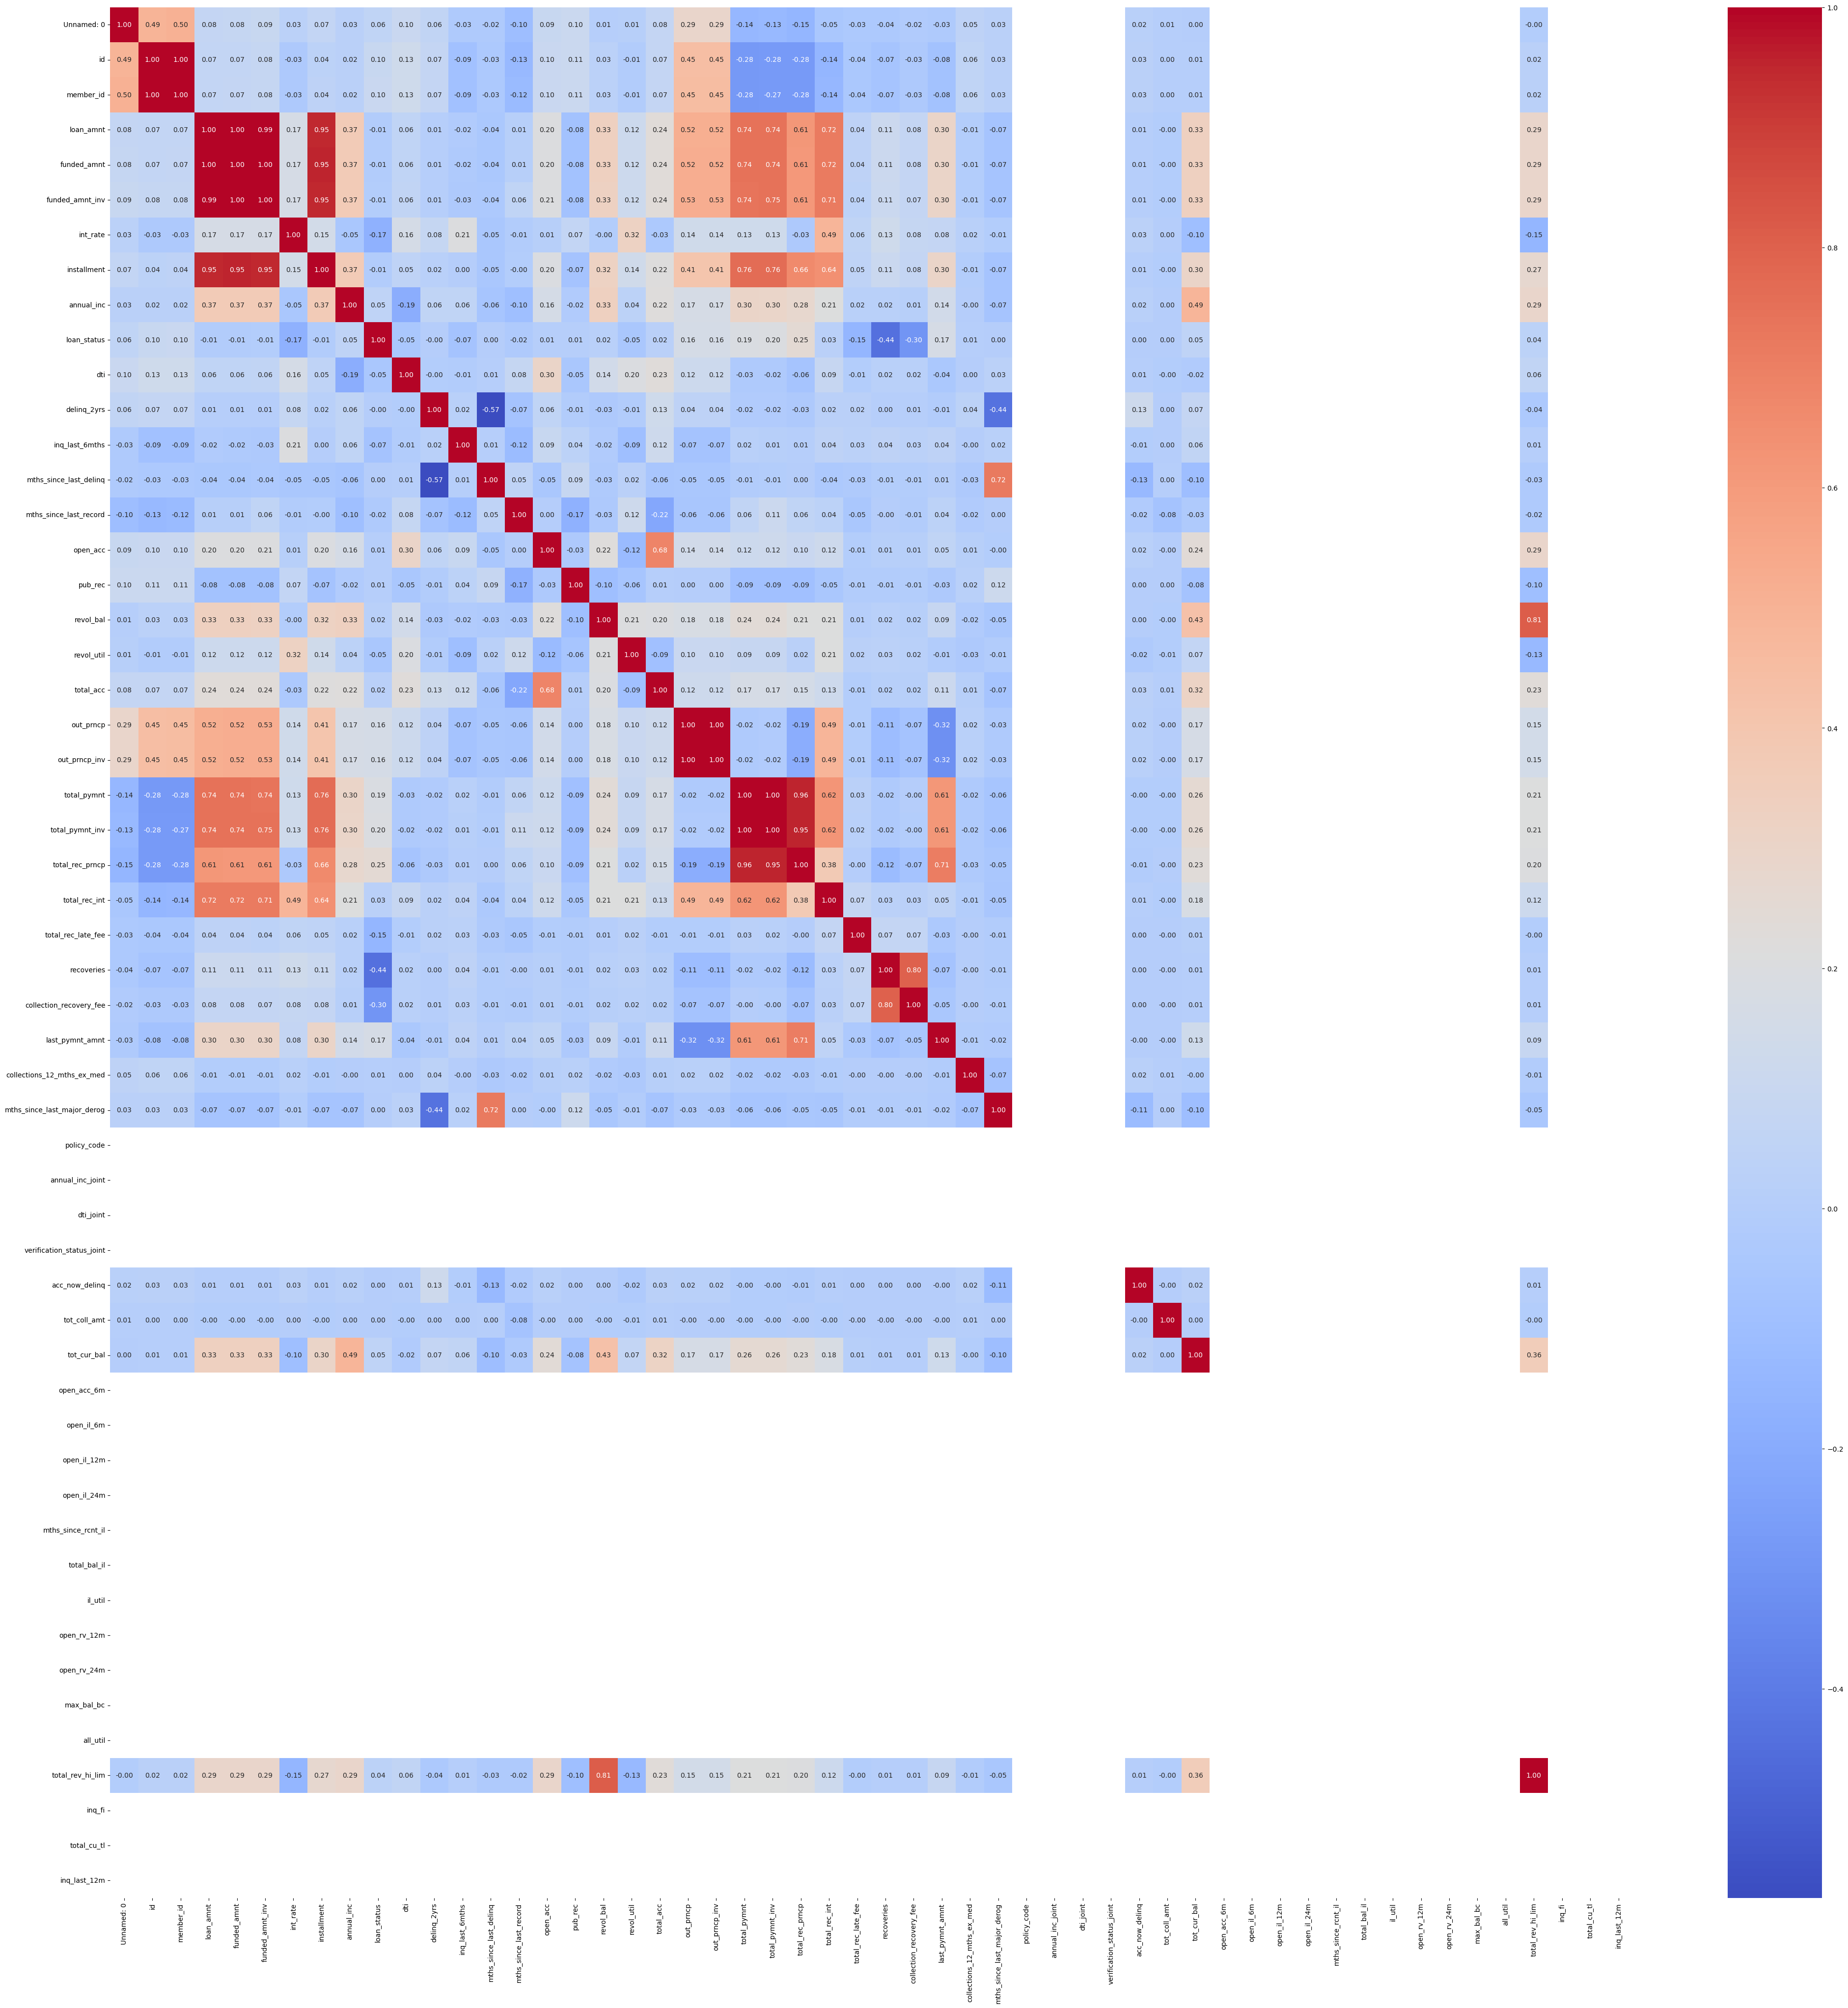

In [69]:
plt.figure(figsize=(50,50)) 
sns.heatmap(df_label.corr(), cmap='coolwarm', annot=True, fmt='.2f') 
plt.show()

Dari correlation heatmap, terdapat beberapa fitur yang memiliki nilai korelasi yang tinggi terhadap loan_status. Untuk mencegah terjadinya multikolinieritas, beberapa fitur tersebut akan dihilangkan dengan menggunakan nilai 0.7 sebagai ambang batas.

### Cek Missing Value using missingno

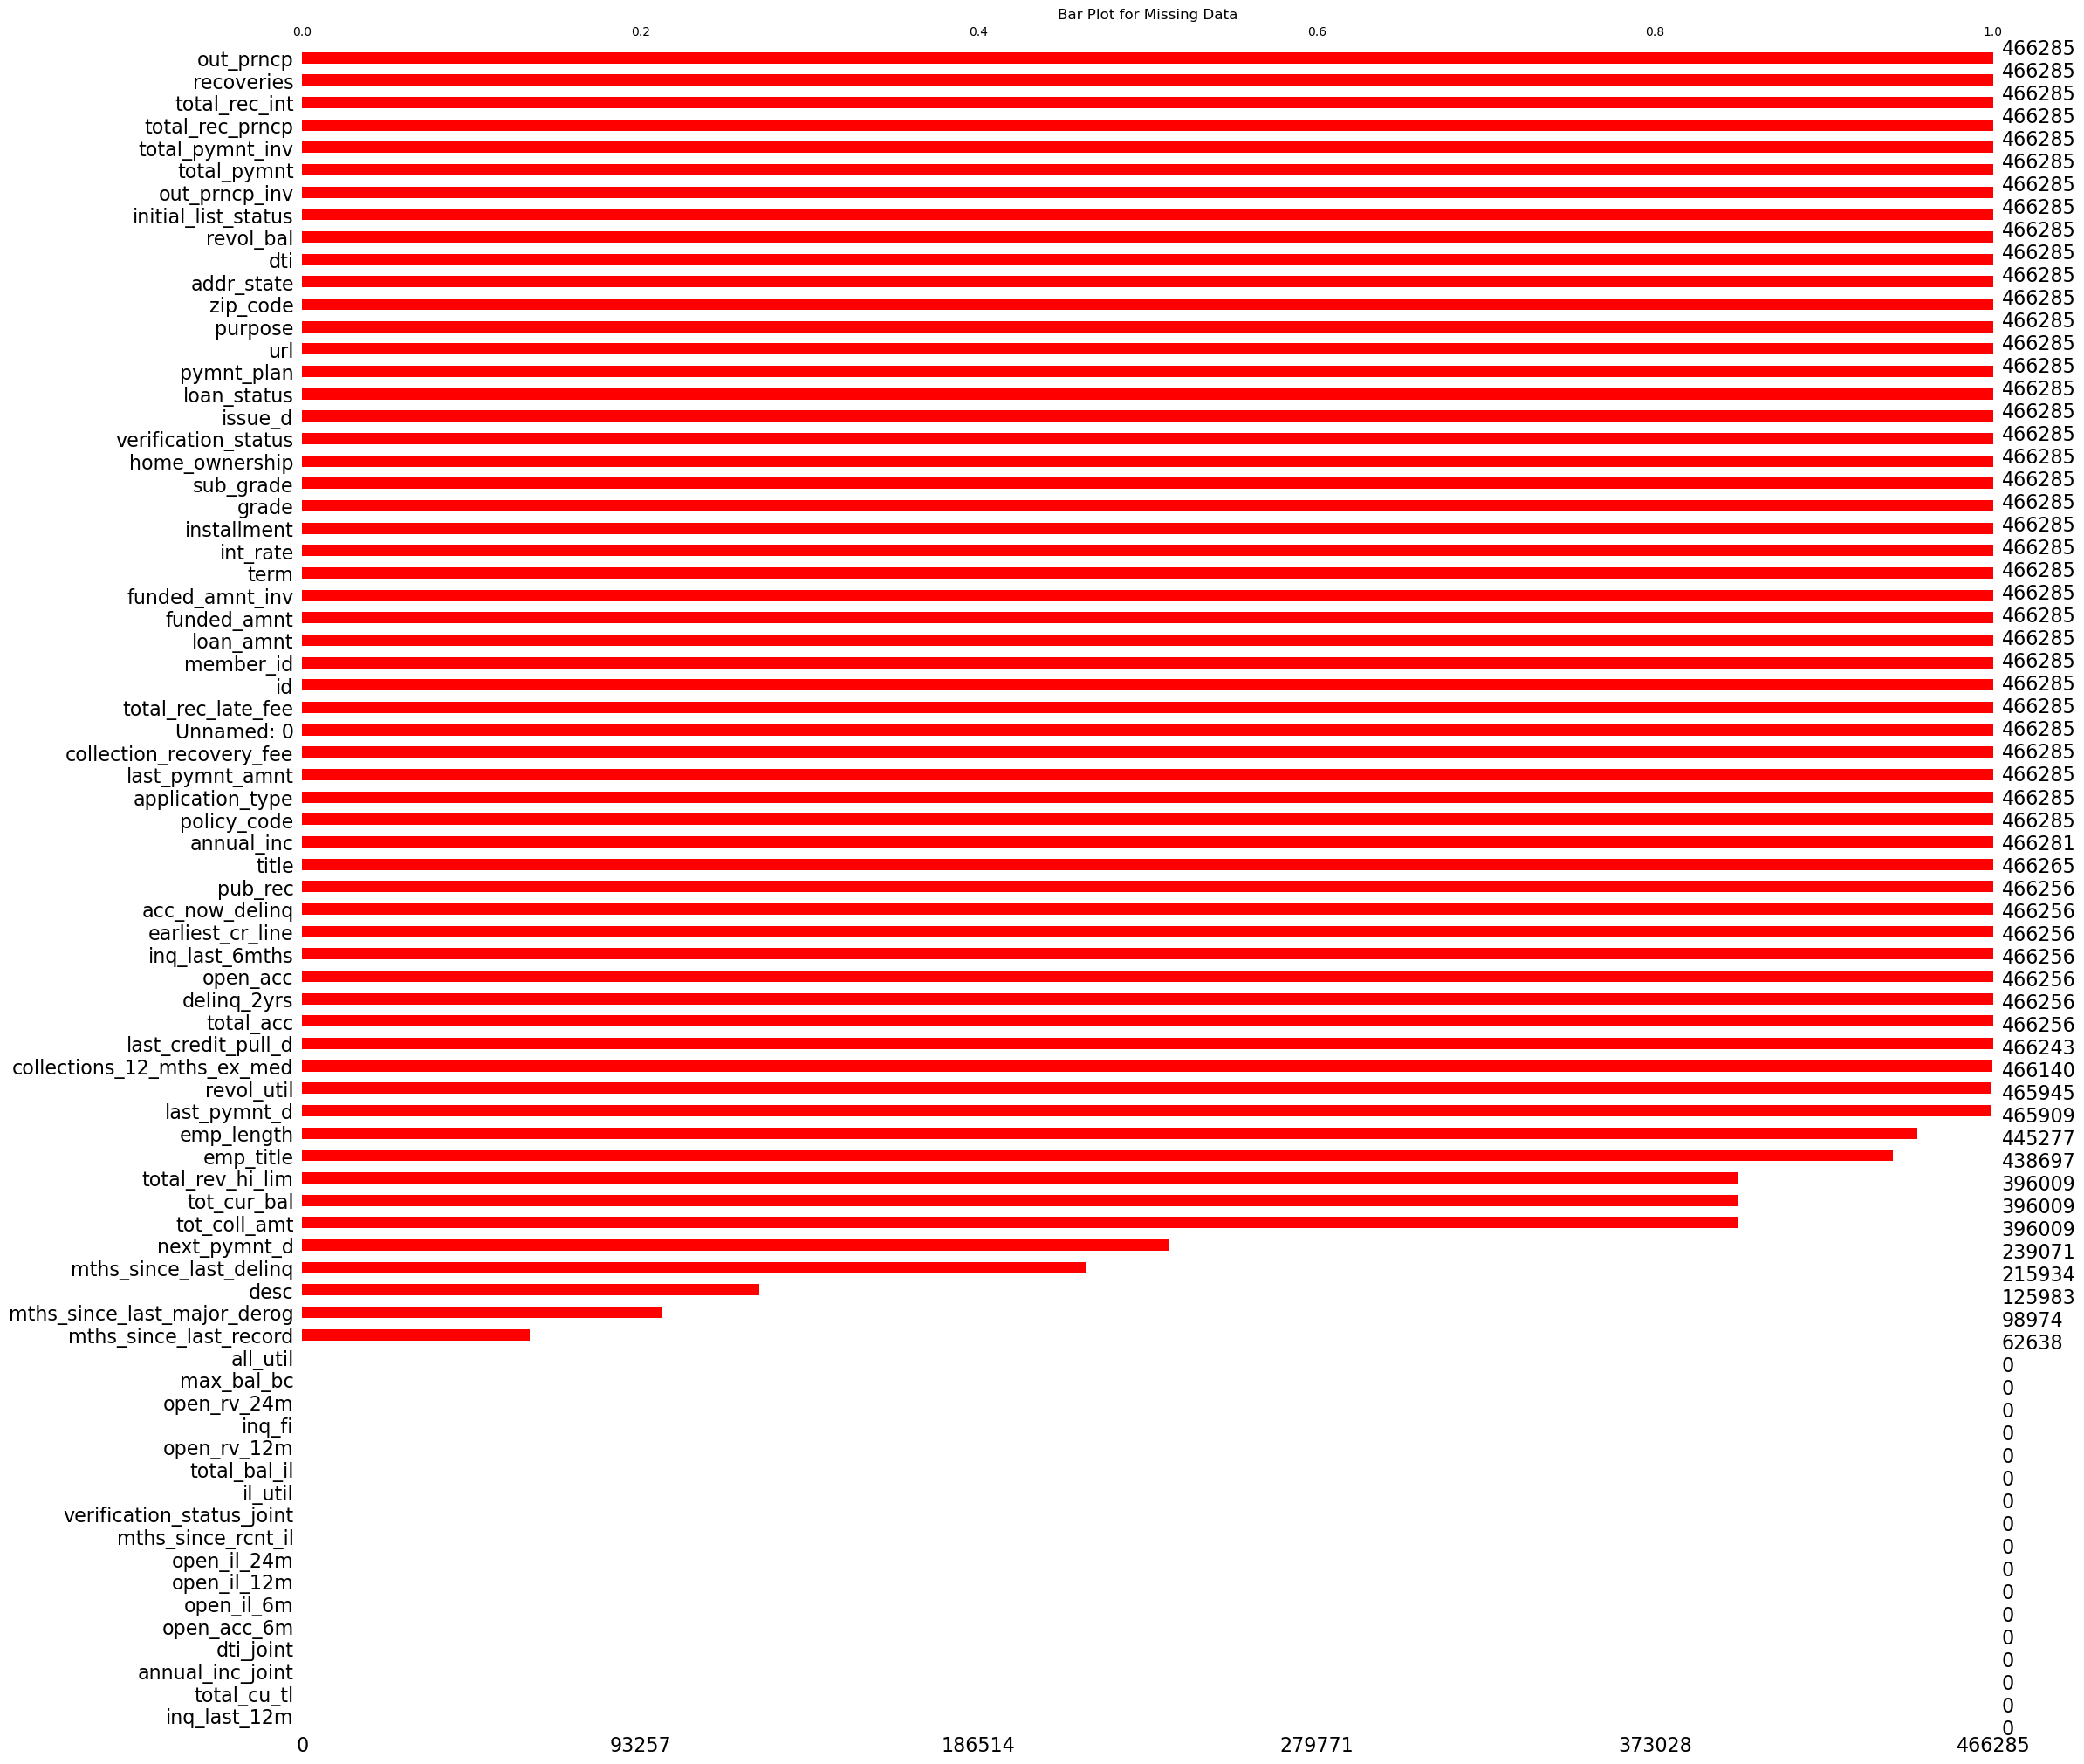

In [70]:
import missingno as msno

# Visualize the number of missing data per column with a bar plot
msno.bar(df_label, color='red', sort='ascending')
plt.title('Bar Plot for Missing Data')
plt.show()

**Features Considered for Dropping**:
- **Unique Identifiers**: `Unnamed: 0`, `id`, and `member_id` represent unique values for each row.
- **Single Value Features**: `policy_code` and `application_type` have only one value.
- **Unnecessary Features**: `title`, `url`, `zip_code`, `addr_state`, and `desc`.
- **Redundant Expert Judgement**: `sub_grade` is a detailed form of `grade`.
- **100% Null Values**: `annual_inc_joint`, `dti_joint`, `verification_status_joint`, `open_acc_6m`, `open_il_6m`, `open_il_12m`, `open_il_24m`, `mths_since_rcnt_il`, `total_bal_il`, `il_util`, `open_rv_12m`, `open_rv_24m`, `max_bal_bc`, `all_util`, `inq_fi`, `total_cu_tl`, and `inq_last_12m`.

**Features with <20% Missing Values**:
- Attributes like `emp_title`, `emp_length`, and `acc_now_delinq` will be maintained and imputed if possible.

**Features with >20% Missing Values**:
- Attributes such as `mths_since_last_delinq`, `mths_since_last_record`, `next_pymnt_d`, and `mths_since_last_major_derog` have a higher probability of being dropped due to the significant impact of imputation on the dataset's originality.

# Data Preparation

## Handling missing values

In [11]:
df_clean = df_label.copy()

In [12]:
# Total null values 
miss_null = df_clean.isnull().sum() 
perc_miss = df_clean.isnull().sum() * 100/ len(df) 
dtypes = [df_clean[col].dtype for col in df_clean.columns] 
df_miss_val = pd.DataFrame({'Total Null': miss_null, 'data_type': dtypes, 'Perc Missing': perc_miss}) 
df_miss_val.sort_values('Perc Missing', ascending = False,inplace = True) 
missing_value = df_miss_val[df_miss_val['Perc Missing']>0].reset_index() 
missing_value

,index,Total Null,data_type,Perc Missing
0,inq_last_12m,466285,float64,100.000000
1,total_bal_il,466285,float64,100.000000
2,dti_joint,466285,float64,100.000000
3,verification_status_joint,466285,float64,100.000000
4,annual_inc_joint,466285,float64,100.000000
5,open_acc_6m,466285,float64,100.000000
6,open_il_6m,466285,float64,100.000000
7,open_il_12m,466285,float64,100.000000
8,open_il_24m,466285,float64,100.000000
9,mths_since_rcnt_il,466285,float64,100.000000


### drop more than 50%

In [13]:
# Drop feature that have more than 50% missing value 
col_full_null = df_miss_val.loc[df_miss_val['Perc Missing']> 50].index.tolist()
df_clean.drop(columns=col_full_null, inplace = True) 
# Drop unrelevant feature 
df_clean.drop(['policy_code','application_type','title', 'url','zip_code',
               'addr_state','sub_grade','Unnamed: 0','id','member_id',
               'emp_title','pymnt_plan','issue_d'], axis = 1, inplace=True)

### input fewer 50% missing

In [14]:
# Feature `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim` replace missing value with "0" because assumption that customer didn't borrow again
for col in ['tot_coll_amt', 'tot_cur_bal']:
    df_clean[col] = df_clean[col].fillna(0)

# Numerical columns replace missing value with "Median"
for col in df_clean.select_dtypes(exclude='object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical columns replace missing value with "Mode"
for col in df_clean.select_dtypes(include='object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])
    
df_clean.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

## Drop High Correlation Feature

Dari correlation heatmap, terdapat beberapa fitur yang memiliki nilai korelasi yang tinggi terhadap loan_status. Untuk mencegah terjadinya multikolinieritas, beberapa fitur tersebut akan dihilangkan dengan menggunakan nilai 0.7 sebagai ambang batas.

In [15]:
cor_matrix = df_clean.corr().abs() 
high = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)) 
hicorr_drop_list = [column for column in high.columns if any(high[column] > 0.7)]
hicorr_drop_list

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14764\2717628686.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df_clean.corr().abs()


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [16]:
df_clean.drop(hicorr_drop_list, axis = 1, inplace=True)
df_clean.corr()['loan_status'].sort_values()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14764\632537974.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()['loan_status'].sort_values()


recoveries                   -0.441171
int_rate                     -0.172361
total_rec_late_fee           -0.147750
inq_last_6mths               -0.073099
revol_util                   -0.050188
dti                          -0.048102
loan_amnt                    -0.011819
delinq_2yrs                  -0.001228
acc_now_delinq                0.000197
tot_coll_amt                  0.001394
collections_12_mths_ex_med    0.005119
open_acc                      0.006174
pub_rec                       0.009110
revol_bal                     0.018348
total_acc                     0.023068
annual_inc                    0.049863
tot_cur_bal                   0.063741
out_prncp                     0.158676
loan_status                   1.000000
Name: loan_status, dtype: float64

## Handling outlier

In [17]:
df_clean.info()
print("Total Rows :", df_clean.shape[0])
print("Total Features :", df_clean.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  int32  
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466285 non-null  float64
 12  earliest_cr_line            466285 non-null  object 
 13  inq_last_6mths

In [18]:
# Calculate variance and skewness
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
stats_df = df_clean[numerical_cols].agg(['var', 'skew']).transpose()
print(stats_df)

                                     var        skew
loan_amnt                   6.866623e+07    0.730980
int_rate                    1.898856e+01    0.334938
annual_inc                  3.020969e+09   29.569024
dti                         6.164010e+01    0.188283
delinq_2yrs                 6.357566e-01    5.345914
inq_last_6mths              1.191553e+00    2.142214
open_acc                    2.487396e+01    1.165772
pub_rec                     2.609660e-01   14.941738
revol_bal                   4.275071e+08   19.476291
revol_util                  5.628284e+02   -0.161151
total_acc                   1.345552e+02    0.813117
out_prncp                   4.038703e+07    1.590189
total_rec_late_fee          2.772791e+01   13.843497
recoveries                  3.049426e+05   13.149942
collections_12_mths_ex_med  1.180083e-02   31.225134
acc_now_delinq              4.710718e-03   20.798942
tot_coll_amt                1.817884e+08  670.873299
tot_cur_bal                 2.211753e+10    3.

Melihat variable var (varian) dan skew (skewness) untuk masing-masing feature, maka ditentukan `loan_amnt`. `annual_inc`, `dti`, `revol_bal` yang akan diterapkan IQR clipping

In [19]:
df_iqr = df_clean.copy()

In [20]:
# Function to handle outliers using IQR clipping
def dynamic_iqr_clipping(df, columns, factor=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Columns selected for outlier handling
columns_to_adjust = ['loan_amnt', 'annual_inc', 'dti', 'revol_bal']

# Apply IQR clipping to handle outliers
df_preparation = dynamic_iqr_clipping(df_iqr, columns_to_adjust, factor=2.0)

# Verify the changes
print(df_iqr.describe())

           loan_amnt       int_rate     annual_inc    loan_status  \
count  466285.000000  466285.000000  466285.000000  466285.000000   
mean    14317.277577      13.829236   70966.562811       0.890693   
std      8286.509164       4.357587   35814.506104       0.312024   
min       500.000000       5.420000    1896.000000       0.000000   
25%      8000.000000      10.990000   45000.000000       1.000000   
50%     12000.000000      13.660000   63000.000000       1.000000   
75%     20000.000000      16.490000   88953.000000       1.000000   
max     35000.000000      26.060000  176859.000000       1.000000   

                 dti    delinq_2yrs  inq_last_6mths       open_acc  \
count  466285.000000  466285.000000   466285.000000  466285.000000   
mean       17.218758       0.284661        0.804695      11.186995   
std         7.851121       0.797343        1.091583       4.987380   
min         0.000000       0.000000        0.000000       0.000000   
25%        11.360000       0

beberapa feature dengan skewness tinggi seperti `pub_rec` tidak diterapkan iqr clipping sebab terlalu besar data yang hilang, begitupun dengan yang lainnya. Sehingga hanya dipilih outlier removal yang dirasa masih retent banyak data. Sehingga berujung tidak ada data yang diremove.

# Feature Engineering

## Feature Encoding

In [21]:
print("\nCategorical Unique Values:")
for column in df_iqr.select_dtypes(include='object').columns:
    print(f"{column}: {df_iqr[column].unique()}")


Categorical Unique Values:
term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
purpose: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
earliest_cr_line: ['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' '

handle datetime feature

In [22]:
df_iqr['earliest_cr_line'] = pd.to_datetime(df_iqr['earliest_cr_line'], format = '%b-%y') 
df_iqr['last_credit_pull_d'] = pd.to_datetime(df_iqr['last_credit_pull_d'], format = '%b-%y') 
df_iqr['last_pymnt_d'] = pd.to_datetime(df_iqr['last_pymnt_d'], format = '%b-%y') 
df_iqr['next_pymnt_d'] = pd.to_datetime(df_iqr['next_pymnt_d'], format = '%b-%y')

In [23]:
df_iqr['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_iqr['earliest_cr_line']) / np.timedelta64(1, 'M'))) 
df_iqr['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_iqr['last_credit_pull_d']) / np.timedelta64(1, 'M'))) 
df_iqr['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_iqr['last_pymnt_d']) / np.timedelta64(1, 'M'))) 
df_iqr['next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-03-01') - df_iqr['next_pymnt_d']) / np.timedelta64(1, 'M')))

Data tanggal diubah menjadi numerical dengna membuatnya menjadi jarak hari terhadap tanggal `2016-03-01` (max recorded date)

In [24]:
print("\nCategorical Unique Values:")
for column in df_iqr.select_dtypes(include='object').columns:
    print(f"{column}: {df_iqr[column].unique()}")


Categorical Unique Values:
term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
purpose: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
initial_list_status: ['f' 'w']


In [25]:
df_encode = df_iqr.copy()

In [26]:
nums = df_encode.select_dtypes(include=np.number).columns
cats = df_encode.select_dtypes(exclude=np.number).columns

In [27]:
for cat in ['term',
            'grade',
            'emp_length',
            'home_ownership',
            'verification_status',
            'purpose',
            'initial_list_status']:
  onehots = pd.get_dummies(df_clean[cat], prefix=cat)
  df_encode = df_encode.join(onehots)

df_encode = df_encode.drop(columns=['term',
                                    'grade',
                                    'emp_length',
                                    'home_ownership',
                                    'verification_status',
                                    'purpose',
                                    'initial_list_status'], axis =1)
df_encode.head()

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,5000,10.65,24000.0,1,27.65,0.0,374.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500,15.27,30000.0,0,1.00,0.0,203.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2400,15.96,12252.0,1,8.72,0.0,172.0,2.0,2.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000,13.49,49200.0,1,20.00,0.0,241.0,1.0,10.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,3000,12.69,80000.0,1,17.94,0.0,242.0,0.0,15.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Split Data

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_encode.drop(['loan_status'], axis=1)
y = df_encode['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'Number of Train Data: {y_train.shape[0]}')
print(f'Number of Test Data: {y_test.shape[0]}')

Number of Train Data: 373028
Number of Test Data: 93257


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 427211 to 121958
Data columns (total 67 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            373028 non-null  float64
 1   int_rate                             373028 non-null  float64
 2   annual_inc                           373028 non-null  float64
 3   dti                                  373028 non-null  float64
 4   delinq_2yrs                          373028 non-null  float64
 5   earliest_cr_line                     373028 non-null  float64
 6   inq_last_6mths                       373028 non-null  float64
 7   open_acc                             373028 non-null  float64
 8   pub_rec                              373028 non-null  float64
 9   revol_bal                            373028 non-null  float64
 10  revol_util                           373028 non-null  float64
 11  total_ac

## Feature Transformation

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def analyze_and_scale(df):
    # Exclude datetime columns from statistical analysis
    datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Simple statistical analysis
    stats = df[numeric_cols].describe().transpose()
    stats['skew'] = df[numeric_cols].skew()
    stats['kurtosis'] = df[numeric_cols].kurtosis()
    print(stats)

    return df

# Call the analyze_and_scale function
df_preparation = analyze_and_scale(X_train)

                               count           mean            std      min  \
loan_amnt                   373028.0   14318.314778    8287.668197   500.00   
int_rate                    373028.0      13.827497       4.354152     5.42   
annual_inc                  373028.0   70953.794360   35787.854102  1896.00   
dti                         373028.0      17.221684       7.845668     0.00   
delinq_2yrs                 373028.0       0.284359       0.796584     0.00   
earliest_cr_line            373028.0     218.516374      93.996505  -633.00   
inq_last_6mths              373028.0       0.804859       1.093220     0.00   
open_acc                    373028.0      11.186222       4.983404     0.00   
pub_rec                     373028.0       0.160213       0.509876     0.00   
revol_bal                   373028.0   14976.840366   11581.078493     0.00   
revol_util                  373028.0      56.175392      23.741489     0.00   
total_acc                   373028.0      25.062628 

#### StandardScaler

1. **loan_amnt**: This represents the loan amount, which can have substantial variations. Standard scaling normalizes this feature by removing the mean and scaling to unit variance, making it appropriate for models that assume normally distributed inputs.
2. **dti (Debt-to-Income Ratio)**: Although a percentage, standardizing this ratio helps in comparing it across different loans and aligns with the normal distribution assumption of many algorithms.
3. **date time data**: Data that was converted and handled from a datetime format to be a range day format will be standard scaled because it doesn't have that big of a range.

#### MinMaxScaler

1. **annual_inc (Annual Income)**: Income values vary widely. MinMax scaling normalizes these values between 0 and 1, preserving the distribution while keeping them within a fixed range.
2. **revol_bal (Revolving Balance)**: Similar to income, the revolving balance has a wide value range. MinMax scaling normalizes this feature without distorting the relative differences.
3. **delinq_2yrs (Delinquencies in Last 2 Years)**: As a count feature, MinMax scaling ensures this value is within a standard range, simplifying model processing.
4. **inq_last_6mths (Inquiries in Last 6 Months)**: Another count feature that benefits from MinMax scaling to standardize its range.
5. **pub_rec (Public Records)**: The count of public records can vary, and MinMax scaling normalizes these values to a standard range.
6. **tot_coll_amt (Total Collection Amount)**: Given the wide range of this feature, MinMax scaling brings it to a uniform scale.
7. **tot_cur_bal (Total Current Balance)**: With large variations in balances, MinMax scaling helps normalize these values.

the rest doesn't need scaling

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def scale_features(df, standard_scaler_cols, minmax_scaler_cols):
    # Scaling with StandardScaler
    if standard_scaler_cols:
        scaler_standard = StandardScaler()
        df[standard_scaler_cols] = scaler_standard.fit_transform(df[standard_scaler_cols])

    # Scaling with MinMaxScaler
    if minmax_scaler_cols:
        scaler_minmax = MinMaxScaler()
        df[minmax_scaler_cols] = scaler_minmax.fit_transform(df[minmax_scaler_cols])

    return df

# Columns to be scaled with StandardScaler
standard_scaler_cols = ['loan_amnt', 'dti','earliest_cr_line','last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d']

# Columns to be scaled with MinMaxScaler
minmax_scaler_cols = ['annual_inc', 'revol_bal', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'tot_coll_amt', 'tot_cur_bal']

# Apply the scale_features function to the X train and test
X_train = scale_features(X_train, standard_scaler_cols, minmax_scaler_cols)
X_test = scale_features(X_test, standard_scaler_cols, minmax_scaler_cols)
# Check the first few rows to ensure the changes
print(X_train.head())
print(X_test.head())    

        loan_amnt  int_rate  annual_inc       dti  delinq_2yrs  \
427211   1.168205      8.90    0.429256  0.597568     0.000000   
206088  -0.521054     14.33    0.629299 -1.240391     0.034483   
136020   0.736841      8.90    0.469265 -0.304842     0.000000   
412305   0.347708     16.59    0.234930 -0.451420     0.034483   
36159   -0.714112     12.84    0.526420  0.677867     0.000000   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  ...  \
427211          1.409455        0.030303      20.0      0.0   0.632906  ...   
206088          0.005145        0.060606      15.0      0.0   0.328732  ...   
136020          0.824326        0.030303       9.0      0.0   0.618874  ...   
412305         -0.101242        0.090909       9.0      0.0   0.156166  ...   
36159          -0.069326        0.030303      14.0      0.0   1.000000  ...   

        purpose_major_purchase  purpose_medical  purpose_moving  \
427211                       0                0              

## Handle Class Imbalance

In [31]:
y_train.value_counts()

1    332250
0     40778
Name: loan_status, dtype: int64

In [32]:
# OVERSAMPLING
from imblearn import over_sampling
X_oversampling , y_oversampling = over_sampling.SMOTE(random_state=42).fit_resample(X_train,y_train)
print(pd.Series(y_oversampling).value_counts())

1    332250
0    332250
Name: loan_status, dtype: int64


# Modelling

## Confusion Matrix Function

In [36]:
from sklearn.metrics import confusion_matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    # masukin probability
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [37]:
# Error happen with ValueError: feature_names must be string, and may not contain [, ] or <.
# so I added this
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Remove or replace invalid characters from feature names if necessary
X_train.columns = X_train.columns.str.replace('[\[\]<]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<]', '', regex=True)

# Ensure the training and testing data have consistent feature names
X_oversampling.columns = X_train.columns

### Logistic Regression

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


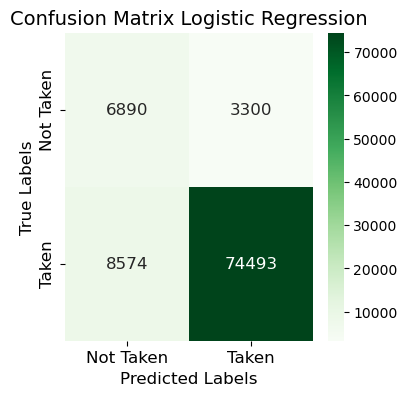

Accuracy (Test Set): 0.87
Precision (Test Set): 0.96
Recall (Test Set): 0.90
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.93


<bound method BaseEstimator.get_params of LogisticRegression(random_state=42)>

In [38]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_oversampling, y_oversampling)

plotting_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
eval_classification(model_LR, X_oversampling, y_oversampling, X_test, y_test)
model_LR.get_params

### Random Forest Classifier

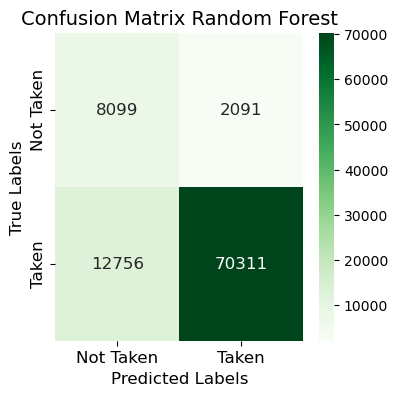

Accuracy (Test Set): 0.84
Precision (Test Set): 0.97
Recall (Test Set): 0.85
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [39]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_oversampling, y_oversampling)

plotting_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
eval_classification(model_RF, X_oversampling, y_oversampling, X_test, y_test)
model_RF.get_params()

### Decision Tree

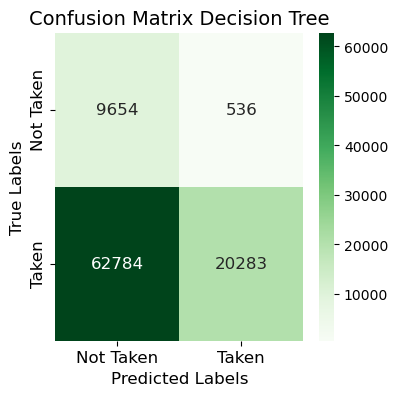

Accuracy (Test Set): 0.32
Precision (Test Set): 0.97
Recall (Test Set): 0.24
F1-Score (Test Set): 0.39
roc_auc (test-proba): 0.60
roc_auc (train-proba): 1.00


<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [40]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_oversampling, y_oversampling)

plotting_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
eval_classification(model_DT, X_oversampling, y_oversampling, X_test, y_test)
model_DT.get_params

### AdaBoost

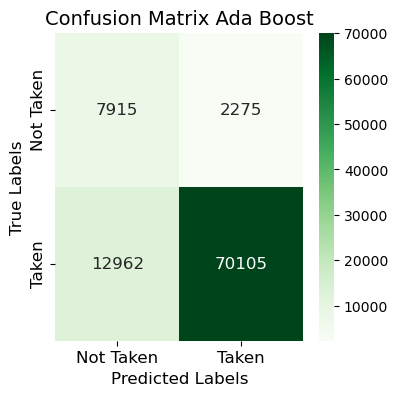

Accuracy (Test Set): 0.84
Precision (Test Set): 0.97
Recall (Test Set): 0.84
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.99


<bound method BaseEstimator.get_params of AdaBoostClassifier(random_state=42)>

In [41]:
from sklearn.ensemble import AdaBoostClassifier

model_ADB = AdaBoostClassifier(random_state=42)
model_ADB.fit(X_oversampling, y_oversampling)

plotting_confusion_matrix(model_ADB, X_test, y_test, title='Ada Boost')
eval_classification(model_ADB, X_oversampling, y_oversampling, X_test, y_test)
model_ADB.get_params

### XGBoost

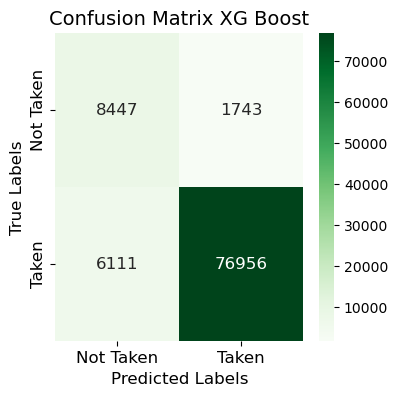

Accuracy (Test Set): 0.92
Precision (Test Set): 0.98
Recall (Test Set): 0.93
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)>

In [42]:
import xgboost as xgb

# Assuming X_train, X_test, y_train, and y_test are your training and testing data
model_XGB = xgb.XGBClassifier(verbosity=0, random_state=42)
model_XGB.fit(X_oversampling, y_oversampling)

plotting_confusion_matrix(model_XGB, X_test, y_test, title='XG Boost')
eval_classification(model_XGB, X_oversampling, y_oversampling, X_test, y_test)
model_XGB.get_params

In [43]:
def eval(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression','Random Forest', 'Decision Tree', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [44]:
model_list_base = [model_LR, model_RF, model_DT,  model_ADB, model_XGB]

results = score_all_classification(model_list_base, X_oversampling, y_oversampling, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Logistic Regression,0.8727,0.9576,0.8968,0.9262,0.8647,0.9327
1,Random Forest,0.8408,0.9711,0.8464,0.9045,0.9055,1.0000
2,Decision Tree,0.3210,0.9743,0.2442,0.3905,0.5958,1.0000
3,AdaBoost,0.8366,0.9686,0.8440,0.9020,0.9147,0.9932
4,XGBoost,0.9158,0.9779,0.9264,0.9514,0.9550,0.9976


## Hyper Parameter Tuning

In [49]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_XGB, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)

In [52]:
random_search.fit(X_oversampling, y_oversampling)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [53]:
# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best Score:  0.9698630549285178


In [54]:
# Access the best estimator
best_model_XGB = random_search.best_estimator_

In [55]:
# Evaluate the best model on the test data
y_pred = best_model_XGB.predict(X_test)

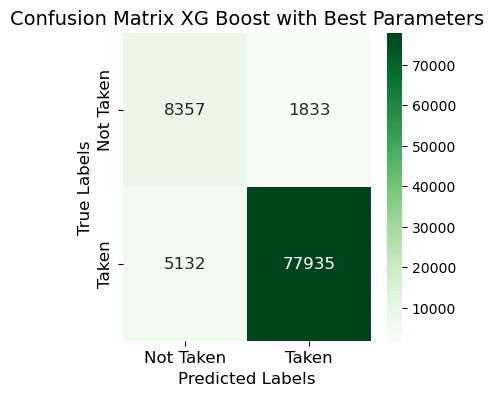

Accuracy (Test Set): 0.93
Precision (Test Set): 0.98
Recall (Test Set): 0.94
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


In [56]:
# Assuming you have these functions defined
plotting_confusion_matrix(best_model_XGB, X_test, y_test, title='XG Boost with Best Parameters')
eval_classification(best_model_XGB, X_oversampling, y_oversampling, X_test, y_test)

## Feature Importance

In [57]:
def show_feature_importance(model, title):
    if type(model).__name__ == 'XGboost':
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        
    ax = feat_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), color='orange')
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance ' + title)

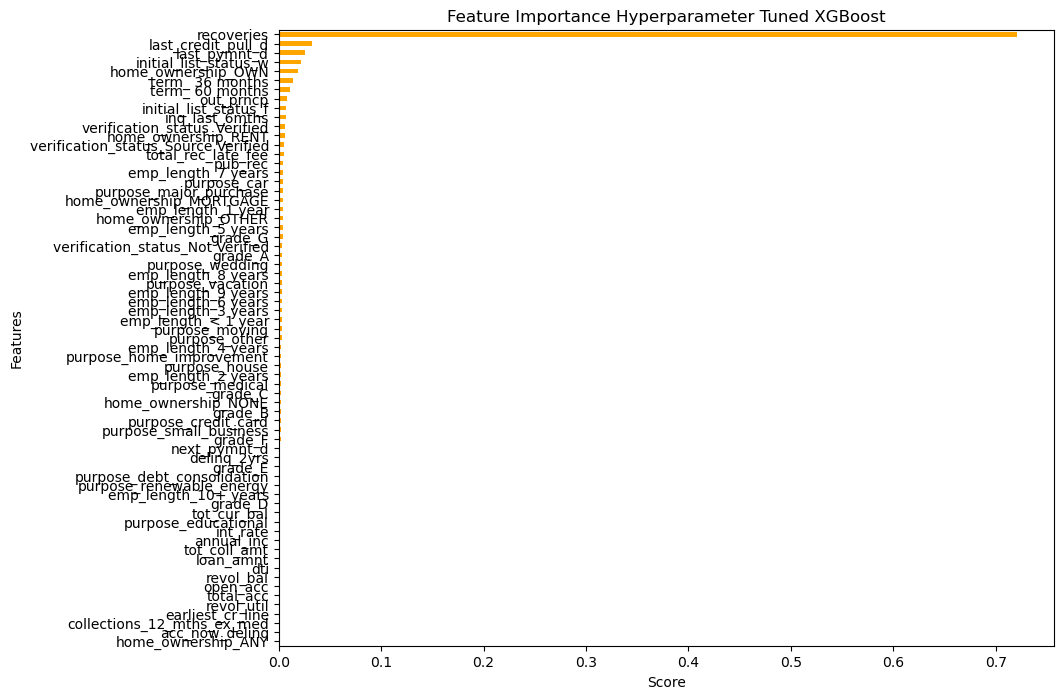

In [58]:
show_feature_importance(best_model_XGB, title='Hyperparameter Tuned XGBoost')

**Recoveries** memiliki pengaruh yang paling tinggi, di mana jika mengambil top 5 dari feature yang paling berpengaruh `last_credit_pull_d`, `last_pymnt_d`, `initial_status_w`, `home_ownership_OWN`